**Asignatura**: 07MBID Machine Learning

**Profesor**: Félix Fuentes

**Alumna**: Cristina Caro González

#  Práctica 1: Aprendizaje no supervisado

Se van a usar los datos de la competición de predicción de los datos del Dengue. Mas información en [enlace](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

**Objetivo**: Utilizar las técnicas de aprendizaje no supervisado para realizar una exploración preliminar de los datos y extraer conclusiones a partir de elementos descartables etc.

**Tecnología**: Python y Google Colab

**Entregable**: Los alumnos trabajarán en Google Colab y entregarán un jupyter notebook (descargadlo como .ipynb para la entrega) describiendo lo siguiente: el problema afrontado, las técnicas utilizadas y su parametrización y los resultados obtenidos incluyendo el usuario de DrivenData utilizado para obtenerlo. Esta memoria contendrá explicaciones sobre los códigos desarrollados.

**Fecha límite**: 21 de noviembre


# Carga de librerías

En primer lugar, procedemos a importar las librerías básicas y de uso general que vamos a tener que usar para realizar la práctica.

Al estar usando Google Colab, no será necesario instalarlas, simplemente tendremos que importarlas usando "import"

Como vemos, hay diferentes tipos de librerías dependiendo de lo que queramos hacer con ellas. Algunas son para visualizaciones, otras para carga de datos, otras para Machine Learning y otras para tratamiento de datasets, por ejemplo. Aunque hay muchas más que no usaremos en esta práctica en concreto.

In [ ]:
import numpy as np
import pandas as pd
import time

# plotting libraries
import matplotlib.pyplot as plt
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import seaborn as sns


# machine learning 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score


# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange


# Carga de Datos

A continuación procedemos a cargar los datos dentro del entorno de funcionalidades que nos permite Google Colab.

In [ ]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

En primer lugar subimos los datos de entrenamiento (es decir, sin target ya que vamos a realizar una práctica de Aprendizaje No Supervisado). 
El fichero en concreto que cargaremos es el llamado: dengue_features_train


In [ ]:
train = upload_files(['city', 'weekofyear', 'year'])
train.head()

Saving dengue_features_train.csv to dengue_features_train (4).csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes


week_start_date  ...  station_precip_mm
city weekofyear year                  ...                   
sj   18         1990      1990-04-30  ...               16.0
     19         1990      1990-05-07  ...                8.6
     20         1990      1990-05-14  ...               41.4
     21         1990      1990-05-21  ...                4.0
     22         1990      1990-05-28  ...                5.8

[5 rows x 21 columns]

A continuación podemos ver que nuestro dataset dispone de 1456 filas y 21 columnas

In [ ]:
train.shape

(1456, 21)

# Preproceso

A continuación empezamos con la fase del preproceso. En esta fase vamos a transformar las variables necesarias para posteriormente poder usarlas en nuestros modelos. Por ejemplo, cambiar variables categóricas a numéricas, estandarizar o normalizar, imputar missings, analizar outliers, etc.

En este paso, procedemos a eliminar la variable llamada "week_start_date" ya que no es necesaria para nuestro análisis.

In [ ]:
train.drop("week_start_date", axis = 1, inplace = True)
train.head()


ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
city weekofyear year                      ...                                       
sj   18         1990  0.122600  0.103725  ...                20.0               16.0
     19         1990  0.169900  0.142175  ...                22.2                8.6
     20         1990  0.032250  0.172967  ...                22.8               41.4
     21         1990  0.128633  0.245067  ...                23.3                4.0
     22         1990  0.196200  0.262200  ...                23.9                5.8

[5 rows x 20 columns]

Posteriormente, vamos a analizar los valores missings o valores perdidos que tenemos en nuestro dataset. 

Para ello, podemos usar varias funciones, en este primer caso, lo que se realiza es una suma por variable de todos los valores missings que tiene esa variable aunque, normalmente, lo más útil es ver el porcentaje de missings, por eso lo realizo en el paso posterior, ya que es una medida proporcional y no absoluta por lo que podemos extraer más información de ella.

In [ ]:
train.isnull().sum()

ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
dtype: int64

In [ ]:
row_num = len(train)

Como he mencionado anteriormente, es mucho más fácil de interpretar el porcentaje de missings y además da información adicional para saber cuántos missings tenemos sobre el total de valores de esa variable en concreto. 

Para ello, dividimos por el número de filas y multiplicamos por 100 y sacaremos el porcentaje.

In [ ]:
(train.isnull().sum()/row_num)*100

ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
ndvi_se                                   1.510989
ndvi_sw                                   1.510989
precipitation_amt_mm                      0.892857
reanalysis_air_temp_k                     0.686813
reanalysis_avg_temp_k                     0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_sat_precip_amt_mm              0.892857
reanalysis_specific_humidity_g_per_kg     0.686813
reanalysis_tdtr_k                         0.686813
station_avg_temp_c                        2.953297
station_diur_temp_rng_c                   2.953297
station_max_temp_c                        1.373626
station_min_temp_c                        0.961538
station_precip_mm              

Vemos que todas las variables disponen de algún valor missing:

In [ ]:
pd.isnull(train).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

Vamos a proceder a completar los valores missings de forma automática, usando el método ffill, es decir, que complete el valor missing justo con su valor anterior.

Después de imputarlos, volvemos a chequear si quedan valores missings y vemos que ya no hay valores missings (Como podemos ver, en todas las variables se muestra "False")

In [ ]:
# ffill: propagate last valid observation forward to next valid backfill
train.fillna(method='ffill', inplace=True)
pd.isnull(train).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

# **Fase 1: Selección de variables**

A continuación nos interesa analizar qué variables son redundantes, cuáles aportan más valor, si están correlacionadas entre sí, etc. Ya que la selección de variables es fundamental a la hora de crear nuestros modelos

Tenemos que elegir variables que expliquen la mayor variabilidad, que no estén correlacionadas entre sí (o al menos que no lo estén mucho) y que aporten valor a nuestro problema.

Para ello, procedemos a realizar una matriz de correlaciones entre las diferentes variables de nuestro dataset.

In [ ]:
train_corr = train.corr(method='spearman')
train_corr

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
ndvi_ne,1.000000,0.845762,0.544432,0.592401,0.289363,-0.361506,-0.062346,0.040861,0.584197,-0.636722,0.243427,0.448402,0.289363,0.080867,0.605893,0.136407,0.669219,0.493734,-0.328555,0.199310
ndvi_nw,0.845762,1.000000,0.524521,0.617325,0.289328,-0.342950,-0.049624,0.064047,0.574913,-0.608073,0.255797,0.457093,0.289328,0.102434,0.578108,0.160245,0.646422,0.497409,-0.314904,0.198267
ndvi_se,0.544432,0.524521,1.000000,0.807506,0.116082,-0.164568,0.040864,0.014992,0.400114,-0.383961,0.050319,0.191037,0.116082,0.037922,0.417007,0.070684,0.383590,0.279160,-0.251081,0.082836
ndvi_sw,0.592401,0.617325,0.807506,1.000000,0.165427,-0.236079,0.006472,0.025153,0.469450,-0.466849,0.116884,0.274719,0.165427,0.054812,0.492361,0.102581,0.485459,0.370035,-0.286025,0.114796
precipitation_amt_mm,0.289363,0.289328,0.116082,0.165427,1.000000,0.018233,0.183512,0.517827,0.481485,-0.148368,0.624268,0.625579,1.000000,0.540258,0.283613,0.317337,0.270444,0.411153,0.124987,0.536466
reanalysis_air_temp_k,-0.361506,-0.342950,-0.164568,-0.236079,0.018233,1.000000,0.898584,0.524626,0.088845,0.781835,-0.104280,-0.293717,0.018233,0.492398,-0.236911,0.640828,-0.286000,0.188733,0.728711,-0.095417
reanalysis_avg_temp_k,-0.062346,-0.049624,0.040864,0.006472,0.183512,0.898584,1.000000,0.616325,0.465615,0.493264,0.012215,-0.079383,0.183512,0.606004,0.131672,0.764492,0.048382,0.482079,0.588968,0.010974
reanalysis_dew_point_temp_k,0.040861,0.064047,0.014992,0.025153,0.517827,0.524626,0.616325,1.000000,0.429899,0.394607,0.575778,0.569979,0.517827,0.997662,0.030465,0.710430,0.030110,0.450697,0.632883,0.298923
reanalysis_max_air_temp_k,0.584197,0.574913,0.400114,0.469450,0.481485,0.088845,0.465615,0.429899,1.000000,-0.424639,0.303129,0.499797,0.481485,0.468224,0.814711,0.551196,0.707813,0.807333,-0.034982,0.281105
reanalysis_min_air_temp_k,-0.636722,-0.608073,-0.383961,-0.466849,-0.148368,0.781835,0.493264,0.394607,-0.424639,1.000000,-0.119827,-0.351764,-0.148368,0.343198,-0.688624,0.317383,-0.659829,-0.256159,0.749447,-0.172018


Vemos qué variables tienen una correlación mayor al 80% y las guardamos para posteriormente poder comparar con otros métodos y ver si las variables "redundantes" son las mismas en todos ellos o en la mayor parte y así proceder a su eliminación si fuera necesario

In [ ]:
train_corr[train_corr > 0.8]

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
ndvi_ne,1.000000,0.845762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ndvi_nw,0.845762,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ndvi_se,NaN,NaN,1.000000,0.807506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ndvi_sw,NaN,NaN,0.807506,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precipitation_amt_mm,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reanalysis_air_temp_k,NaN,NaN,NaN,NaN,NaN,1.000000,0.898584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reanalysis_avg_temp_k,NaN,NaN,NaN,NaN,NaN,0.898584,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reanalysis_dew_point_temp_k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.997662,NaN,NaN,NaN,NaN,NaN,NaN
reanalysis_max_air_temp_k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.814711,NaN,NaN,0.807333,NaN,NaN
reanalysis_min_air_temp_k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para verlo de una manera más visual, procedemos a dibujar un mapa del calor con las diferentes variables. El color rojo significa que la correlación es más alta entre ellas y el color azulado significa que la correlación es más baja.

No nos interesa meter dos variables muy correlacionadas ya que ambas nos estarían aportando información muy similar. Lo que nos interesa es usar variables con poca correlación donde podamos explicar más la variabilidad de nuestro dataset y obtengamos información adicional entre ellas.

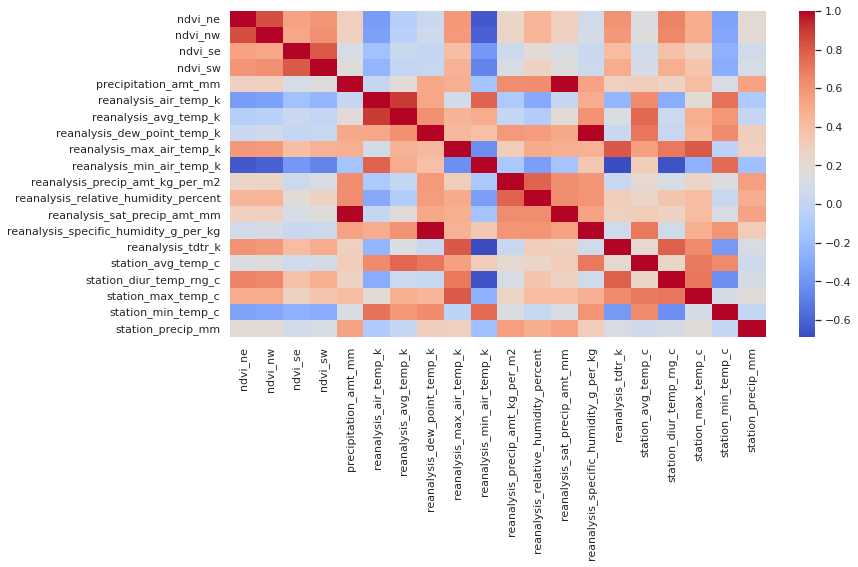

In [ ]:
sns.heatmap(train_corr,
            xticklabels=train_corr.columns,
            yticklabels=train_corr.columns,
            cmap="coolwarm")

En el mapa de correlaciones anterior, podemos ver algunas variables con fuerte correlación:

1. ndvi_ne - ndvi_nw
2. reanalysis_max_air_temp_k - station_max_temp_c
3. ndvi_se - ndvi_sw
4. reanalysis_max_air_temp_k -  reanalysis_tdtr_k
5. precipitation_amt_mm - reanalysis_sat_precip_amt_mm
6. reanalysis_air_temp_k - reanalysis_avg_temp_k	
7. reanalysis_max_air_temp_k -  reanalysis_tdtr_k
8. reanalysis_dew_point_temp_k - reanalysis_specific_humidity_g_per_kg

Vemos todas las variables de nuestro dataset, sin eliminar ninguna todavía

In [ ]:
train.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

Procedemos a transponer la matriz para poder hacer el resto de análisis de selección de variables.

In [ ]:
train_tr = transpose(train)

In [ ]:
names =  train_tr.index
names

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

Procedemos a visualizar los primeros registros de nuestro dataset transpuesto

In [ ]:
train_tr.head()

city                         sj             ...         iq           
weekofyear                   18         19  ...         24         25
year                       1990       1990  ...       2010       2010
ndvi_ne                0.122600   0.169900  ...   0.333914   0.298186
ndvi_nw                0.103725   0.142175  ...   0.245771   0.232971
ndvi_se                0.198483   0.162357  ...   0.278886   0.274214
ndvi_sw                0.177617   0.155486  ...   0.325486   0.315757
precipitation_amt_mm  12.420000  22.820000  ...  59.670000  63.220000

[5 rows x 1456 columns]

A continuación, vamos a proceder a realizar análisis de PCA sobre el Dataset transpuesto.

Esto lo hacemos como método de selección de variables, para ver qué variables explican más la varianza para elegir las que más información nos aportan y así poder usar estas posteriormente.

Como he mencionado anteriormente, no nos interesa meter variables muy parecidas/correlacionadas ya que no aportarían información complementaria.

**PCA**

A continuación, antes de realizar PCA, procedemos a la normalización de los datos a partir de los coeficientes mínimo y máximo. Para ello, usamos el método min_max_scaler

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



Variance Ratio:  [0.97883602 0.01292526]


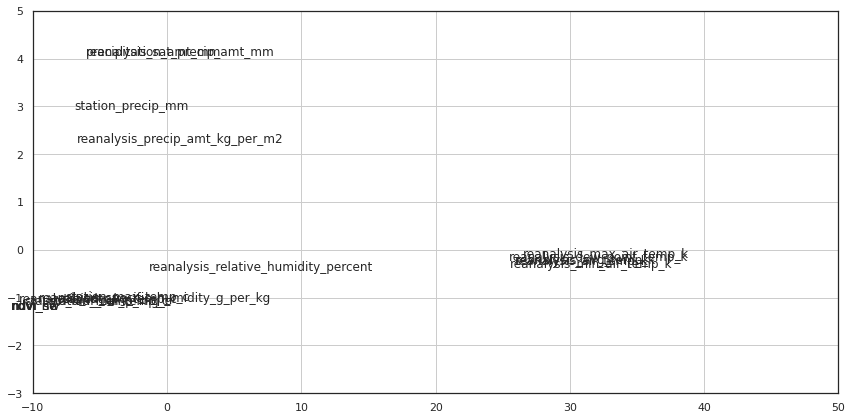

In [ ]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(train_tr)


# Análisis de componentes principales
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-10, 50)
plt.ylim(-3, 5)
ax.grid(True)
fig.tight_layout()
plt.show()

En el gráfico anterior podemos ver que con una sola componente explicamos el 97.88 % de la información. En un análisis, sobre todo de cara a entregar a un cliente final, también es necesario que las decisiones tomadas y las representaciones sean claras y entendibles. 

Si tomáramos solo una componente no seríamos capaces de dibujarlo en un plano, por ello, elegimos dibujar dos componentes para que resulte mucho más fácil de visualizar y a la vez de entender.

En el gráfico anterior, hay variables que difieren mucho del resto, como por ejemplo, reanalysis_precip_amt_kg_per_m2 o station precip mm.

En la parte de abajo podemos ver un subconjunto donde se superponen los nombres de unas variables con otras, es decir, parece ser que estas variables (las del grupo de abajo) están muy correlacionadas entre sí, por lo que no deberíamos meter varias del mismo grupo ya que aportarían información, lo más posible, redundante.


# Clustering jerarquico

Otro método de ver qué variables deberíamos seleccionar y cuáles no, sería usando el clustering jerárquico el cual vamos a proceder a realizar a continuación.

El algoritmo de clúster jerárquico agrupa los datos basándose en la distancia entre cada uno y buscando que los datos que están dentro de un clúster sean los más similares entre sí.

En nuestro caso, vamos a usar la distancia euclídea.

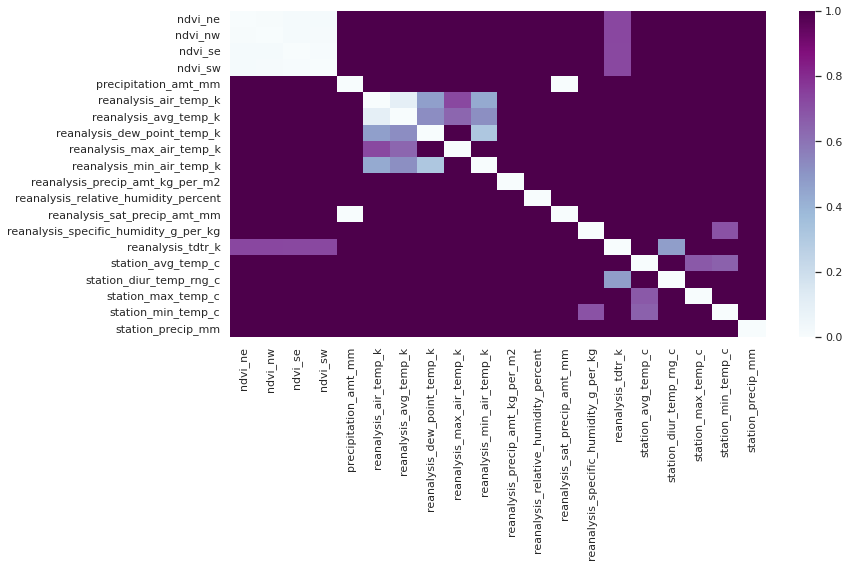

In [ ]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names, cmap= 'BuPu')

Vemos que muchas variables están muy alejadas entre sí (según la distancia euclídea), pero vemos que hay otras cuya distancia es pequeña entre sí. Algunos de estos últimos casos son:

1. reanalysis_avg_temp_k - reanalysis_min_air_temp_k
2. reanalysis_tdtr_k - station_diur_temp_rng_c
3. precipitation_amt_mm - reanalysis_sat_precip_amt_mm

Como vemos, en el dendograma de abajo, justo coinciden con las variables que están en el mismo grupo.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



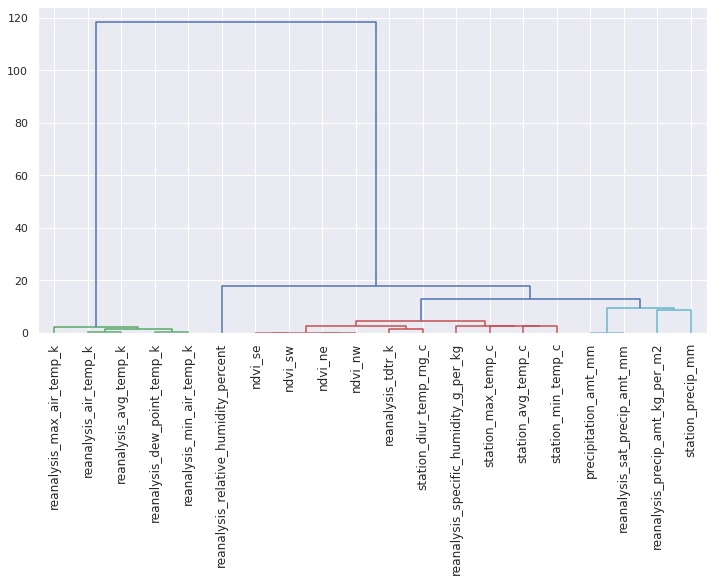

In [ ]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, color_threshold = 10, labels = names , leaf_rotation=90)
plt.show()

Lo ideal sería coger una variable de cada grupo y también la variable diferente para poder así añadir más información. Aunque, como en la mayoría de los casos, también tendremos que probar diferentes formas para ver cuál se adapta mejor

Haciendo un corte en 8 tendriamos 6 clusters

In [ ]:
cut = 8 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
labels

array([2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 4, 6, 3, 2, 2, 2, 2, 2, 2, 5],
      dtype=int32)

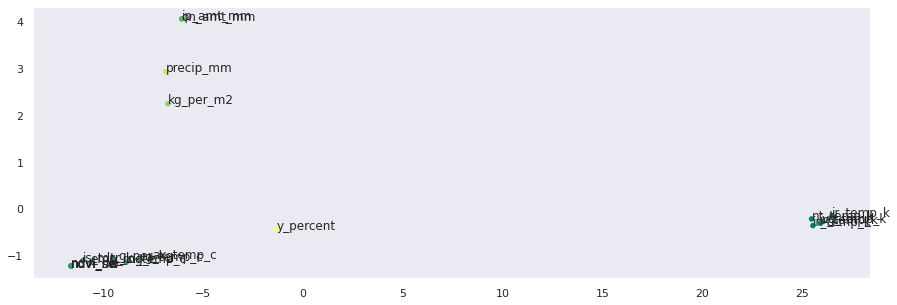

In [ ]:
#plotting orginal points with color related to label
plt.figure(figsize=(15,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=20,cmap='summer')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][-9:]) 


plt.grid()
plt.show()

Vemos los 6 clústers que tenemos, cada uno con diferente color.
 
Lo ideal sería coger una variable de cada cluster para no tener información redundante pero antes de hacerlo, vamos a comprobar seleccionando variables con otros métodos para ver si obtenemos resultados similares

# Probamos ahora con el DBSCAN

A continuación vamos a usar el método de DBSCAN para selección de variables junto con la PCA realizada anteriormente.

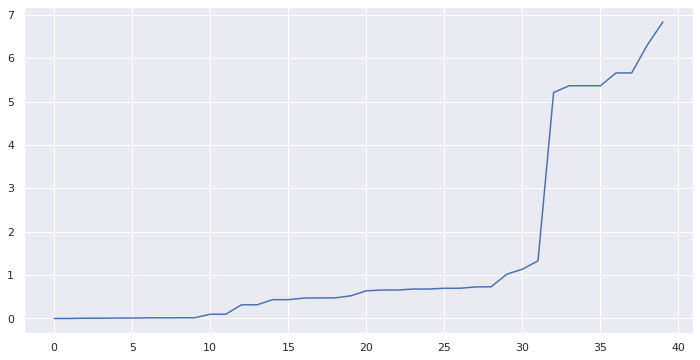

In [ ]:
minPts=2
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, 120, 10))
#ax.set_yticks(np.arange(0, 3, 0.2))

plt.plot(seq)


plt.show()

vemos que un buen punto de epsilon podria ser 5 , probamos algunos usando la función arange que empieza por 2 y termina en 35 y va a saltos de uno a uno.

In [ ]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.001, 35, 0.2):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels

  0.00, 1, 18
  0.20, 3, 12
  0.40, 4, 10
  0.60, 4, 8
  0.80, 4, 3
  1.00, 4, 3
  1.20, 3, 3
  1.40, 3, 3
  1.60, 3, 3
  1.80, 3, 3
  2.00, 3, 3
  2.20, 3, 3
  2.40, 3, 3
  2.60, 3, 3
  2.80, 3, 3
  3.00, 3, 3
  3.20, 3, 3
  3.40, 3, 3
  3.60, 3, 3
  3.80, 3, 3
  4.00, 3, 3
  4.20, 3, 3
  4.40, 3, 3
  4.60, 3, 3
  4.80, 3, 3
  5.00, 3, 3
  5.20, 3, 3
  5.40, 2, 2
  5.60, 2, 2
  5.80, 2, 1
  6.00, 2, 1
  6.20, 2, 1
  6.40, 2, 0
  6.60, 2, 0
  6.80, 2, 0
  7.00, 2, 0
  7.20, 2, 0
  7.40, 2, 0
  7.60, 2, 0
  7.80, 2, 0
  8.00, 2, 0
  8.20, 2, 0
  8.40, 2, 0
  8.60, 2, 0
  8.80, 2, 0
  9.00, 2, 0
  9.20, 2, 0
  9.40, 2, 0
  9.60, 2, 0
  9.80, 2, 0
 10.00, 2, 0
 10.20, 2, 0
 10.40, 2, 0
 10.60, 2, 0
 10.80, 2, 0
 11.00, 2, 0
 11.20, 2, 0
 11.40, 2, 0
 11.60, 2, 0
 11.80, 2, 0
 12.00, 2, 0
 12.20, 2, 0
 12.40, 2, 0
 12.60, 2, 0
 12.80, 2, 0
 13.00, 2, 0
 13.20, 2, 0
 13.40, 2, 0
 13.60, 2, 0
 13.80, 2, 0
 14.00, 2, 0
 14.20, 2, 0
 14.40, 2, 0
 14.60, 2, 0
 14.80, 2, 0
 15.00, 2, 0
 15.20, 2

Elegimos epsilon=0.4 y nos saldrían cuatro clusters

In [ ]:
db = DBSCAN(eps=0.4, min_samples=minPts).fit(features_norm)
labels_db = db.labels_
labels_db

array([ 0,  0,  0,  0,  1,  2,  2,  3, -1,  3, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1])

A continuación vemos nuestro gráfico con los cuatro clústers y los 10 outliers

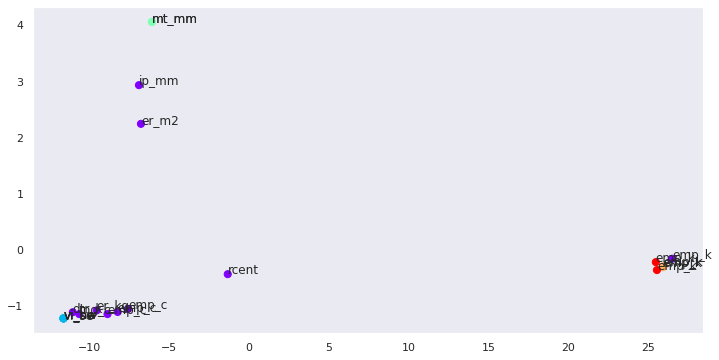

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db,s=50, cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][-5:]) 
plt.grid()
plt.show()

Vemos que en este caso, nos salen cuatro grupos diferentes, vemos que la agrupación es diferente a la del clúster jerárquico obtenida anteriormente. 

A continuación visualizamos qué variables son los outliers. Vemos que en nuestro caso son: reanalysis_precireanalysis_max_air_temp_k, reanalysis_precip_amt_kg_per_m2, reanalysis_relative_humidity_percent, reanalysis_specific_humidity_g_per_kg, reanalysis_tdtr_k, station_avg_temp_c, station_diur_temp_rng_c, station_max_temp_c, station_min_temp_c, station_precip_mm

In [ ]:
train_tr['dbscan_group'] = labels_db

variables_out = train_tr[train_tr['dbscan_group'] == -1]
variables_out


city                                           sj  ... dbscan_group
weekofyear                                     18  ...             
year                                         1990  ...             
reanalysis_max_air_temp_k              299.800000  ...           -1
reanalysis_precip_amt_kg_per_m2         32.000000  ...           -1
reanalysis_relative_humidity_percent    73.365714  ...           -1
reanalysis_specific_humidity_g_per_kg   14.012857  ...           -1
reanalysis_tdtr_k                        2.628571  ...           -1
station_avg_temp_c                      25.442857  ...           -1
station_diur_temp_rng_c                  6.900000  ...           -1
station_max_temp_c                      29.400000  ...           -1
station_min_temp_c                      20.000000  ...           -1
station_precip_mm                       16.000000  ...           -1

[10 rows x 1457 columns]

Vemos qué variables pertenecen al grupo de dbscan 0. A continuación vemos las diferentes variables asociadas a este grupo

In [ ]:
db_group_0 = train_tr[train_tr['dbscan_group'] == 0]
db_group_0

city              sj                      ...        iq           dbscan_group
weekofyear        18        19        20  ...        24        25             
year            1990      1990      1990  ...      2010      2010             
ndvi_ne     0.122600  0.169900  0.032250  ...  0.333914  0.298186            0
ndvi_nw     0.103725  0.142175  0.172967  ...  0.245771  0.232971            0
ndvi_se     0.198483  0.162357  0.157200  ...  0.278886  0.274214            0
ndvi_sw     0.177617  0.155486  0.170843  ...  0.325486  0.315757            0

[4 rows x 1457 columns]

In [ ]:
names_db_group_0 = db_group_0.index

In [ ]:
names_db_group_0

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], dtype='object')

A continuación analizamos las correlaciones entre las variables asociadas al grupo/clúster 0 para ver qué correlación existe entre ellas y quedarnos solo con algunas de ellas para no añadir información redundante.

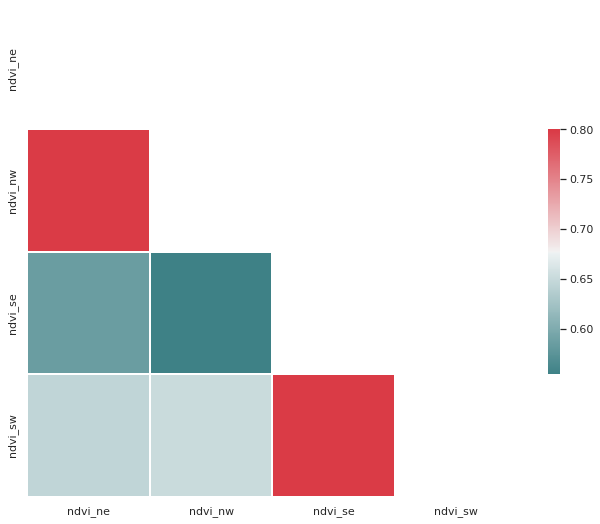

In [ ]:
corr_0 = corrcoef(db_group_0)
sns.set(style="white")
mask = np.zeros_like(corr_0, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_0, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names_db_group_0, yticklabels=names_db_group_0,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Es muy fácil ver que la variable ndvi_se está muy correlacionada con la variable ndvi_sw

Las variables del grupo 0 son las siguientes:

In [ ]:
db_group_0.index

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], dtype='object')

A continuación vemos qué variables pertencen al grupo/clúster número 1

In [ ]:
db_group_1 = train_tr[train_tr['dbscan_group'] == 1]

In [ ]:
names_db_group_1 = db_group_1.index

In [ ]:
names_db_group_1

Index(['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm'], dtype='object')

Procedemos a hacer un análisis de correlaciones entre las variables del grupo 1, muy similar a lo que hemos hecho para el grupo 0. 

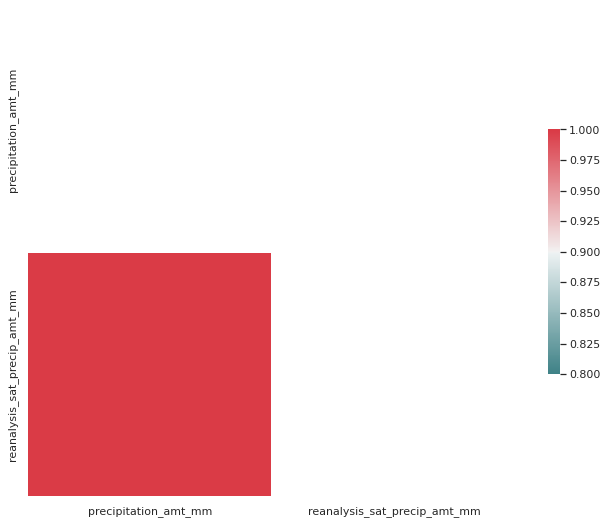

In [ ]:
corr_1 = corrcoef(db_group_1)
sns.set(style="white")
mask = np.zeros_like(corr_1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_1, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names_db_group_1, yticklabels=names_db_group_1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
db_group_1.index

Index(['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm'], dtype='object')

In [ ]:
train.head(2)

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
city weekofyear year                     ...                                       
sj   18         1990   0.1226  0.103725  ...                20.0               16.0
     19         1990   0.1699  0.142175  ...                22.2                8.6

[2 rows x 20 columns]

En nuestro dataset final aun no hemos eliminado ninguna de las variables, ya que lo que hemos hecho previamente es el estudio de cada una de ellas, sus correlaciones y relaciones para ver qué variables podremos eliminar en la práctica 2 de tal manera que nos quedemos con las variables que explican más la variabilidad y aporten más información.

Tras realizar el análisis anterior, los resultados obtenidos con el cluster jerárquico, dbscan, PCA y correlaciones, podemos concluir que las variables que, en principio, aportan más valor a nuestro dataset son:

- 'reanalysis_specific_humidity_g_per_kg',
- 'reanalysis_dew_point_temp_k', 
- 'reanalysis_max_air_temp_k', 
- 'station_avg_temp_c'
- 'reanalysis_relative_humidity_percent'
- 'station_min_temp_c'
- 'precipitation_amt_mm'


In [ ]:
train_final=train.copy()
train_final.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

# **Fase 2: Métodos de clustering** ¿Existen grupos?

* Debemos tener en cuenta que el data set tiene 2 ciudades, por lo tanto podría darse el caso de que existiesen dos clústers (relacionados con la ciudad) pero tenemos que ver si esto se cumple y si es así, probarlo.

Normalizamos nuestro dataset original

In [ ]:
from sklearn import preprocessing 
scaled_features=train_final.copy()
min_max_scaler = preprocessing.MinMaxScaler()
col_names= ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']
features = scaled_features[col_names]
scaler = min_max_scaler.fit(scaled_features.values)
features= scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features


ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
city weekofyear year                      ...                                       
sj   18         1990  0.578226  0.614835  ...            0.486239           0.029450
     19         1990  0.629943  0.657063  ...            0.688073           0.015829
     20         1990  0.479441  0.690881  ...            0.743119           0.076201
     21         1990  0.584823  0.770066  ...            0.788991           0.007362
     22         1990  0.658698  0.788882  ...            0.844037           0.010676
...                        ...       ...  ...                 ...                ...
iq   21         2010  0.818931  0.851154  ...            0.706422           0.049696
     22         2010  0.619290  0.677048  ...            0.642202           0.067366
     23         2010  0.714304  0.661327  ...            0.412844           0.013620
     24         2010  0.809270  0.770839  ...            0.577982           0.029450
     25         2010  0.770206  0.756782  ...            0.688073           0.037548

[1456 rows x 20 columns]

Eliminamos la ciudad, el año y la variable weekofyear ya que no nos hace falta para nuestro análisis de clúster

In [ ]:
data_dia2 = scaled_features.copy()
data_dia2=data_dia2.reset_index()
y = data_dia2['city']
del data_dia2['city']
del data_dia2['year']
del data_dia2['weekofyear']

In [ ]:
data_dia2

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.578226,0.614835,0.386418,0.395544,0.031797,0.388291,0.354667,0.314680,0.123457,0.692308,0.056091,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450
1,0.629943,0.657063,0.321190,0.359233,0.058423,0.472710,0.441778,0.489213,0.191358,0.730769,0.031446,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829
2,0.479441,0.690881,0.311879,0.384430,0.088428,0.548064,0.496000,0.657583,0.166667,0.800000,0.045749,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201
3,0.584823,0.770066,0.438912,0.491150,0.039324,0.575260,0.539556,0.643471,0.222222,0.776923,0.024365,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362
4,0.658698,0.788882,0.481601,0.509943,0.019252,0.645515,0.593778,0.701541,0.253086,0.815385,0.021385,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.818931,0.851154,0.490886,0.584064,0.141577,0.621152,0.731556,0.815572,0.734568,0.584615,0.078878,0.758854,0.141577,0.774093,0.575463,0.769504,0.656950,0.561290,0.706422,0.049696
1452,0.619290,0.677048,0.273679,0.474367,0.221377,0.488385,0.560000,0.773236,0.660494,0.384615,0.363015,0.828282,0.221377,0.726560,0.416748,0.641844,0.529785,0.516129,0.642202,0.067366
1453,0.714304,0.661327,0.480079,0.487587,0.150896,0.259490,0.336000,0.665207,0.475309,0.423077,0.088694,0.893932,0.150896,0.605194,0.418695,0.319149,0.210393,0.354839,0.412844,0.013620
1454,0.809270,0.770839,0.531588,0.638162,0.152765,0.226062,0.327111,0.645093,0.512346,0.384615,0.109255,0.903240,0.152765,0.583143,0.444012,0.429078,0.373046,0.290323,0.577982,0.029450


In [ ]:
scaled_features_copy=scaled_features.copy()
scaled_features_copy=scaled_features_copy.reset_index()


scaled_features_copy_temp=scaled_features_copy[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']]

In [ ]:
scaled_features_copy

,city,weekofyear,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,18,1990,0.578226,0.614835,0.386418,0.395544,0.031797,0.388291,0.354667,0.314680,0.123457,0.692308,0.056091,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450
1,sj,19,1990,0.629943,0.657063,0.321190,0.359233,0.058423,0.472710,0.441778,0.489213,0.191358,0.730769,0.031446,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829
2,sj,20,1990,0.479441,0.690881,0.311879,0.384430,0.088428,0.548064,0.496000,0.657583,0.166667,0.800000,0.045749,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201
3,sj,21,1990,0.584823,0.770066,0.438912,0.491150,0.039324,0.575260,0.539556,0.643471,0.222222,0.776923,0.024365,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362
4,sj,22,1990,0.658698,0.788882,0.481601,0.509943,0.019252,0.645515,0.593778,0.701541,0.253086,0.815385,0.021385,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,21,2010,0.818931,0.851154,0.490886,0.584064,0.141577,0.621152,0.731556,0.815572,0.734568,0.584615,0.078878,0.758854,0.141577,0.774093,0.575463,0.769504,0.656950,0.561290,0.706422,0.049696
1452,iq,22,2010,0.619290,0.677048,0.273679,0.474367,0.221377,0.488385,0.560000,0.773236,0.660494,0.384615,0.363015,0.828282,0.221377,0.726560,0.416748,0.641844,0.529785,0.516129,0.642202,0.067366
1453,iq,23,2010,0.714304,0.661327,0.480079,0.487587,0.150896,0.259490,0.336000,0.665207,0.475309,0.423077,0.088694,0.893932,0.150896,0.605194,0.418695,0.319149,0.210393,0.354839,0.412844,0.013620
1454,iq,24,2010,0.809270,0.770839,0.531588,0.638162,0.152765,0.226062,0.327111,0.645093,0.512346,0.384615,0.109255,0.903240,0.152765,0.583143,0.444012,0.429078,0.373046,0.290323,0.577982,0.029450


Probamos a realizar un clúster jerárquico aplicando PCA anteriormente (método para reducir dimensionalidad)

In [ ]:
train_PCA= train
names =  train_PCA.index

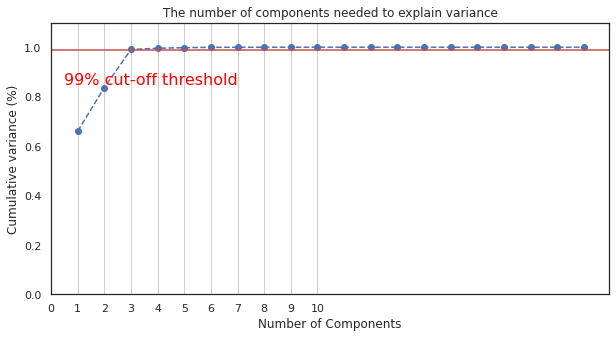

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(train_PCA)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 21, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

En el gráfico anterior vemos que el mejor número de componentes sería 3

Variance Ratio:  [0.42673065 0.2807942  0.1123039 ]


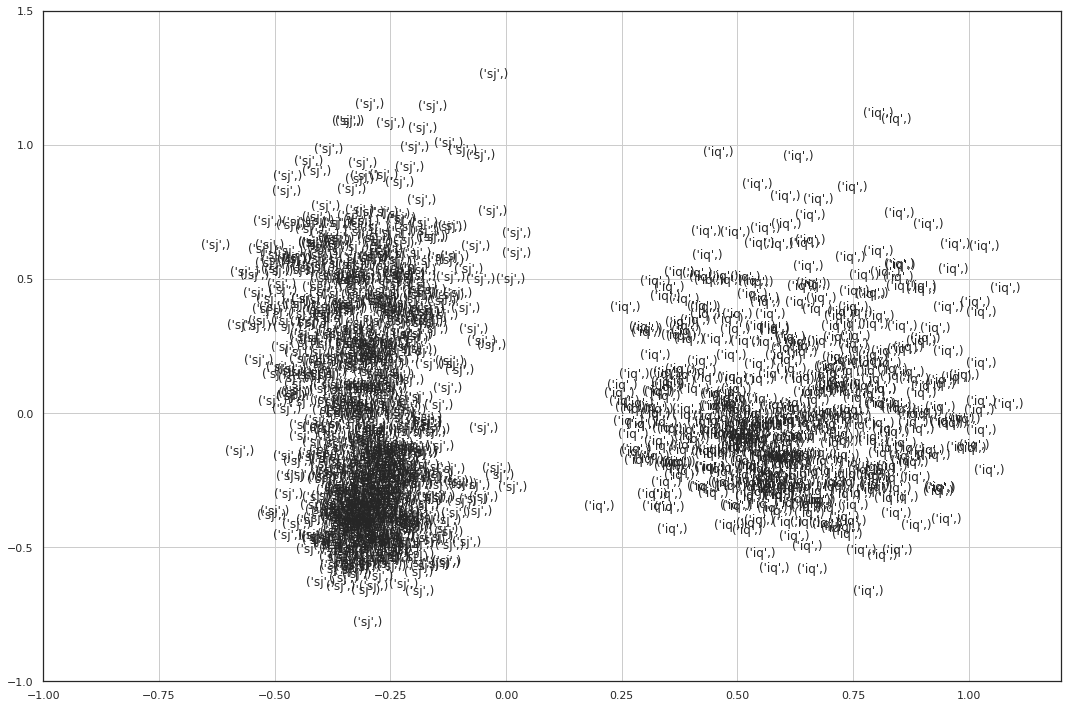

In [ ]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm_2 = min_max_scaler.fit_transform(train_PCA)

#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 3)
X_pca = estimator.fit_transform(features_norm_2)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:1]) 


plt.xlim(-1, 1.2)
plt.ylim(-1, 1.5)
ax.grid(True)
fig.tight_layout()
#plt.figure(figsize=(20,10))
plt.show()

A continuación podemos ver que solo usando las dos primeras dos componentes, explicamos un 70% de la variabilidad de nuestro conjunto. A simple vista, parece ser que el dataset queda muy bien dividido por ciudades, en cambio, para estar seguro de ello vamos a proceder a realizar otros métodos para ver si con todos ellos obtenemos resultados similares. Si así lo es, podríamos concluir que podríamos dividir nuestro dataset por ciudad.

# **Clúster Jerárquico**

Usamos la distancia euclídea

In [ ]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm_2)

Construimos el dendograma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



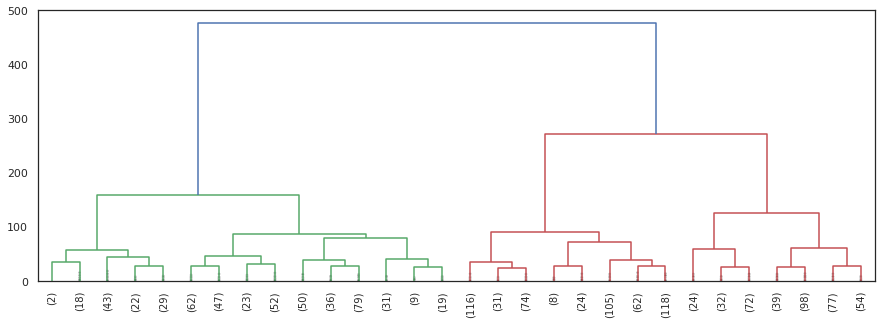

In [ ]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'ward')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
plt.figure(figsize=(15,5))
cluster.hierarchy.dendrogram(clusters, color_threshold = 300, labels = names , leaf_rotation=90,truncate_mode='lastp',show_contracted=True)
plt.show()

Al cortar en 300 se pueden ver claramente dos clústers. Vemos que esos dos clústers coinciden con las dos ciudades que tenemos.

In [ ]:
cut = 300 
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

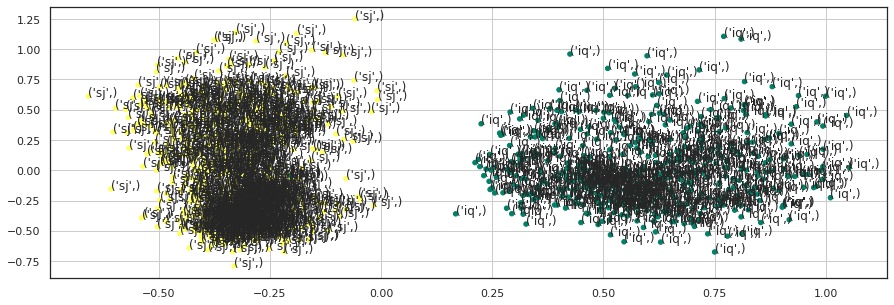

In [ ]:
#plotting orginal points with color related to label

plt.figure(figsize=(15,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=20,cmap='summer')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:1]) 


plt.grid()
plt.show()

A continuación, graficamos las variables en base a la ciudad. Este gráfico es muy visual pues nos permite ver qué características son muy diferentes entre una ciudad y otra por lo que esas variables serán muy buenas para luego usarlas en los clústering ya que separa muy bien una ciudad de otra.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

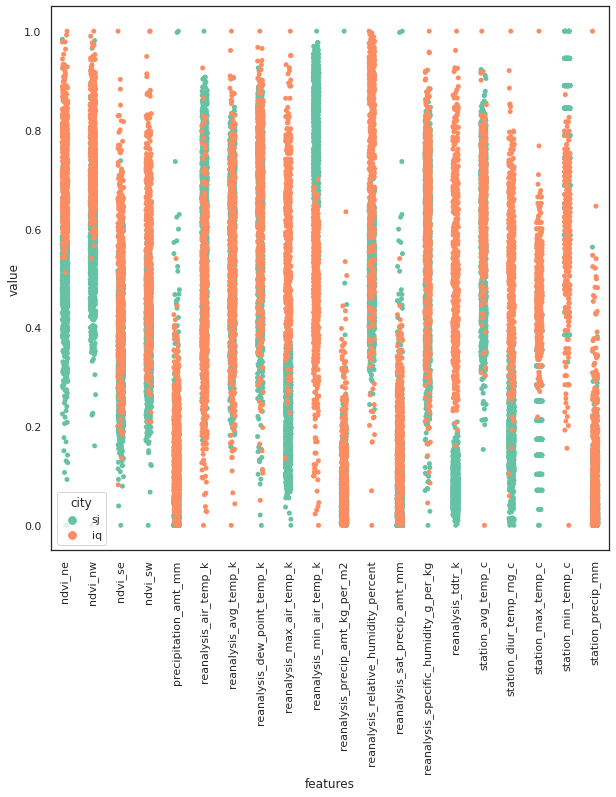

In [ ]:
data_dia2 = scaled_features.copy()
data_dia2=data_dia2.reset_index()


y = data_dia2['city']
del data_dia2['city']
del data_dia2['year']
del data_dia2['weekofyear']

data2 = pd.concat([y,data_dia2],axis=1)
data2 = pd.melt(data2,id_vars="city",
                    var_name="features",
                    value_name='value')
pd.to_numeric(data2['value'], downcast='float')
plt.figure(figsize=(10,10))
sns.stripplot(x="features", y="value", hue="city", palette="Set2",data=data2)
plt.xticks(rotation=90)

Tras ver con PCA y clúster jerárquico que nuestro dataset se podría dividir entre ciudades, vamos a ver qué variables separan mejor las dos ciudades. Para ello, hemos dibujado el gráfico anterior.

Podemos ver que, las variables ndvi_nw, reanalysis_tdtr_k y reanalysis_relative_humidity_percent separan bastante bien las ciudades entre sí (se puede ver claramente la separación entre las ciudades en el gráfico anterior según los valores que toman las variables). Es decir, los valores tomados entre una ciudad y otra son muy diferentes lo que permiten diferenciarlas.

Dado que al realizar clústers (sin aplicar PCA) no es recomendable meter todas las variables (ya que no es fácil de entender ni de explicar de cara al cliente, por ejemplo), sino ir probando con pocas variables e ir ajustando poco a poco, vamos a elegir esas tres variables para realizar clústerings usando las variables originales (pero estandarizadas). Escojo solo esas tres y veo que los resultados son muy buenos (después de probar con menos y más variables y con otras variables también).


Como he mencionado anteriormente, escojo esas tres variables y pruebo a realizar clústers con ellas (en este caso no usamos PCA). Vemos que los resultados obtenidos son muy buenos y que tras hacer la matriz de correlación con la ciudad, la correlación es de un 100% es decir, los dos clústers que se nos forman corresponden a cada una de las ciudades.

In [ ]:
scaled_features_copy_temp=scaled_features_copy[[ 'ndvi_nw','reanalysis_tdtr_k', 'reanalysis_relative_humidity_percent']]

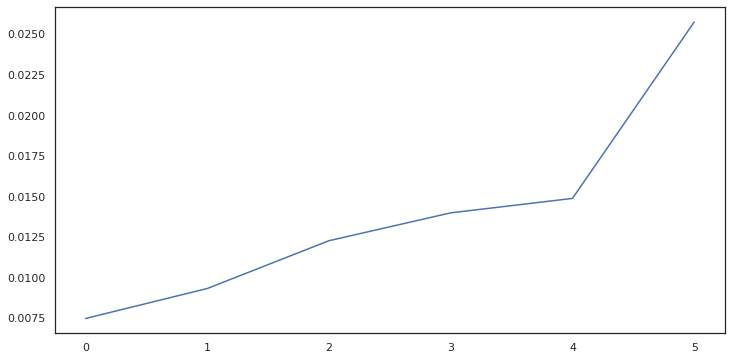

In [ ]:
minPts=2
matdist= dist.pairwise(scaled_features_copy_temp)
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(scaled_features_copy_temp, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(scaled_features_copy_temp):
    for j in range(len(scaled_features_copy_temp)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, 120, 10))
#ax.set_yticks(np.arange(0, 3, 0.2))

plt.plot(seq)


plt.show()
#epsilon 0.0045

Hacemos un barrido de epsilon entre 0.01250 y 0.4 con subidas de 0.01

In [ ]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.001250, 0.4085325, 0.01):
  db = DBSCAN(eps, min_samples=minPts).fit(scaled_features_copy_temp)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.4f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels

0.0013, 5, 1446
0.0112, 147, 1005
0.0213, 125, 473
0.0312, 74, 235
0.0413, 35, 120
0.0513, 17, 69
0.0612, 9, 41
0.0713, 5, 27
0.0813, 2, 16
0.0912, 2, 12
0.1013, 2, 9
0.1113, 2, 8
0.1212, 2, 8
0.1313, 2, 7
0.1413, 2, 4
0.1512, 2, 3
0.1613, 2, 2
0.1713, 2, 2
0.1812, 2, 1
0.1913, 2, 0
0.2013, 2, 0
0.2112, 2, 0
0.2213, 2, 0
0.2313, 2, 0
0.2412, 2, 0
0.2512, 2, 0
0.2612, 1, 0
0.2712, 1, 0
0.2812, 1, 0
0.2912, 1, 0
0.3012, 1, 0
0.3112, 1, 0
0.3212, 1, 0
0.3312, 1, 0
0.3412, 1, 0
0.3513, 1, 0
0.3612, 1, 0
0.3712, 1, 0
0.3812, 1, 0
0.3912, 1, 0
0.4012, 1, 0


Elijo epsilon= 0.1913 ya que me salen 2 clusters con 0 outliers (es decir, corresponderían lo más seguro con las ciudades, posteriormente lo veremos con la matriz de correlación)

In [ ]:
from sklearn.cluster import DBSCAN

'''for eps in np.arange(0.0845,0.0845, 1):'''

eps=0.1913
db = DBSCAN(eps, min_samples=minPts).fit(scaled_features_copy_temp)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = list(labels).count(-1)
print ("%6.4f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels

0.1913, 2, 0


In [ ]:
n_clusters_

2

In [ ]:
labels

array([0, 0, 0, ..., 1, 1, 1])

**Probamos con el método de DBSCAN**

Vemos que los dos clústers se ven perfectos

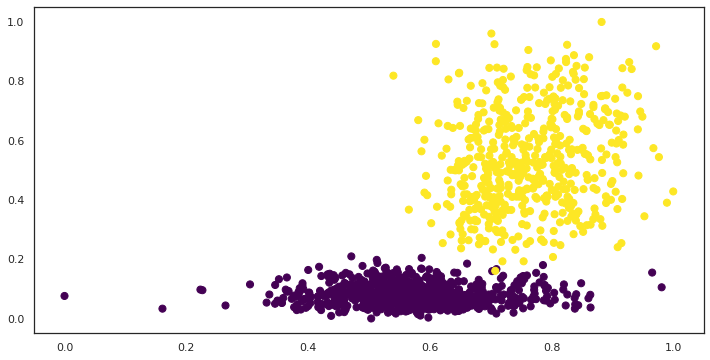

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils

dbscan = DBSCAN(eps=0.1913,
          #eps=0.0280,
          min_samples=3)

cluster = dbscan.fit_predict(scaled_features_copy_temp)

plt.scatter(scaled_features_copy_temp.iloc[:, 0], scaled_features_copy_temp.iloc[:, 1], c=cluster, s=50, cmap='viridis')

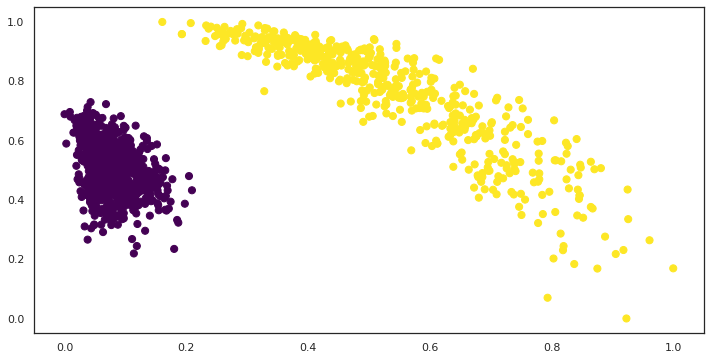

In [ ]:
plt.scatter(scaled_features_copy_temp.iloc[:, 1], scaled_features_copy_temp.iloc[:, 2], c=cluster, s=50, cmap='viridis')

Probamos ahora con el método de K-Means para ver si también obtemos clusters similares y vemos que son muy similares a los del DBSCAN

In [ ]:
# K-Means

Text(0, 0.5, 'Feature 1')

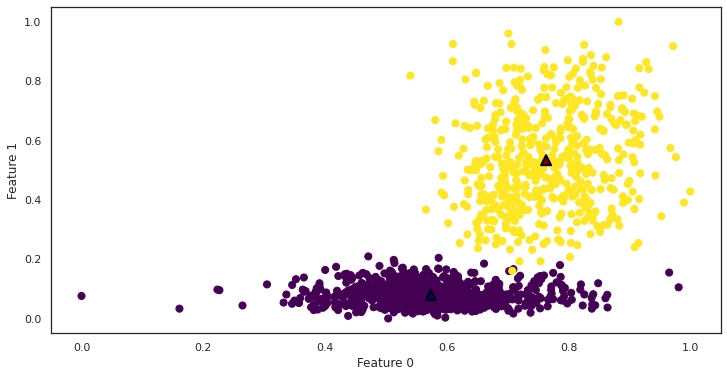

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(scaled_features_copy_temp)
centers = kmeans.cluster_centers_

# plot the cluster assignments and cluster centers
#plt.scatter(scaled_features_copy_temp.iloc[:,0], scaled_features_copy_temp.iloc[:,1], c=y_pred, cmap="jet")
plt.scatter(scaled_features_copy_temp.iloc[:, 0], scaled_features_copy_temp.iloc[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1], 
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Dibujamos las otras dos componentes, al igual que hicimos con el DBSCAN y podemos ver muy claramente la separación entre ellos

Text(0, 0.5, 'Feature 1')

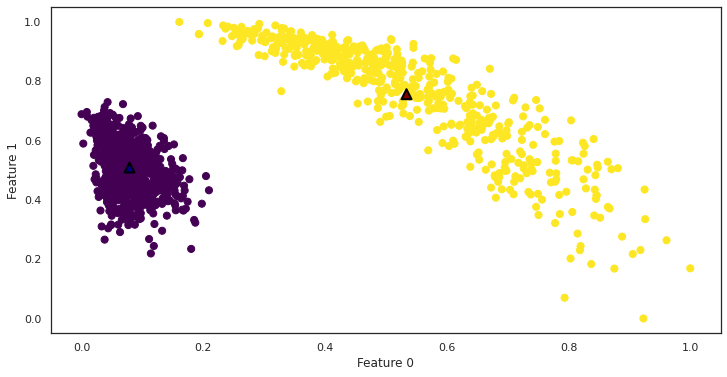

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(scaled_features_copy_temp)
centers = kmeans.cluster_centers_

# plot the cluster assignments and cluster centers
#plt.scatter(scaled_features_copy_temp.iloc[:,0], scaled_features_copy_temp.iloc[:,1], c=y_pred, cmap="jet")
plt.scatter(scaled_features_copy_temp.iloc[:, 1], scaled_features_copy_temp.iloc[:, 2], c=y_pred, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1],   
            kmeans.cluster_centers_[:, 2],
            marker='^', 
            c=[0, 1], 
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Si no tuvieramos idea del número de clústers que deberíamos aplicar, haríamos los gráficos de distortions y silhouettes. En nuestro caso no tiene mucho sentido ya que se ve claramente que son dos, pero lo pongo para que sea más completo. Estos gráficos, como podemos ver no son 100% fiables, ya que según ellos, lo mejor serían 3 clusters

In [ ]:
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 20):
    km = KMeans(i, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=42)
    clustering = km.fit_predict(scaled_features_copy_temp)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(scaled_features_copy_temp, clustering))

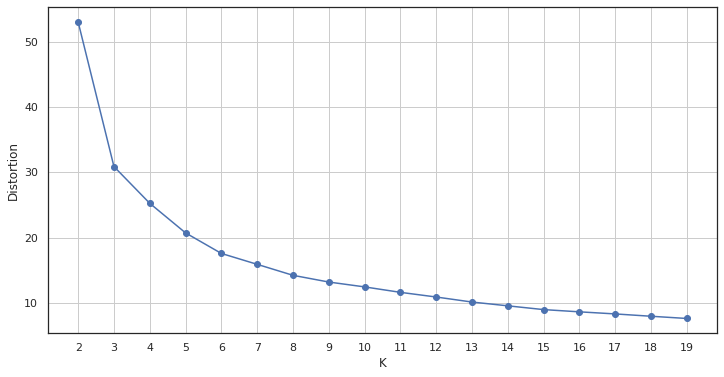

In [ ]:
plt.plot(range(2,20), distortions, marker='o')
plt.xticks(range(2, 20))
plt.xlabel('K')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

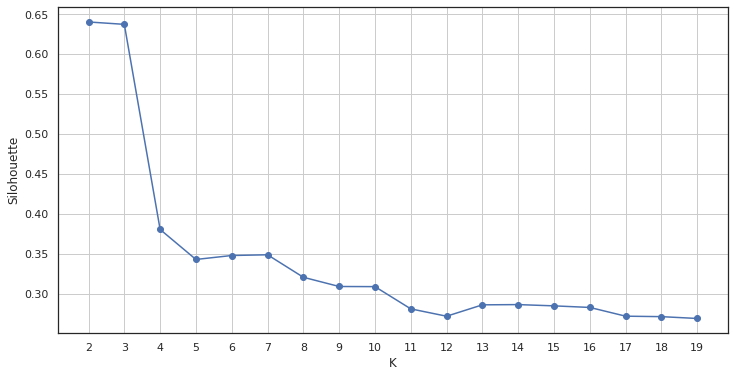

In [ ]:
plt.plot(range(2,20), silhouettes , marker='o')
plt.xticks(range(2, 20))
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.grid(True)
plt.show()

Probamos también a la creación de los clústers mediante la técnica de Mean Shift. Vemos que los resultados son muy similares a los anteriores, es decir 2 clusters

In [ ]:
# Mean shift

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
from PIL import Image

In [ ]:
scaled_features_copy_temp2= scaled_features_copy_temp[['ndvi_nw', 'reanalysis_tdtr_k', 'reanalysis_relative_humidity_percent']]
scaled_features_copy_temp2

,ndvi_nw,reanalysis_tdtr_k,reanalysis_relative_humidity_percent
0,0.614835,0.086660,0.381614
1,0.657063,0.069133,0.479668
2,0.690881,0.064265,0.594415
3,0.770066,0.073028,0.552387
4,0.788882,0.112950,0.555396
...,...,...,...
1451,0.851154,0.575463,0.758854
1452,0.677048,0.416748,0.828282
1453,0.661327,0.418695,0.893932
1454,0.770839,0.444012,0.903240


In [ ]:
# calculamos el mean shift
 
# vamos a calcular el ancho de banda "h" automáticamente
bandwidth = estimate_bandwidth(scaled_features_copy_temp2, quantile=.2, n_samples=500)
print(f'Ancho de banda estimado: {bandwidth}')

# aplicamos el mean shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(scaled_features_copy_temp2)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = labels.max()+1

Ancho de banda estimado: 0.19914883680418277


In [ ]:
n_clusters_

2

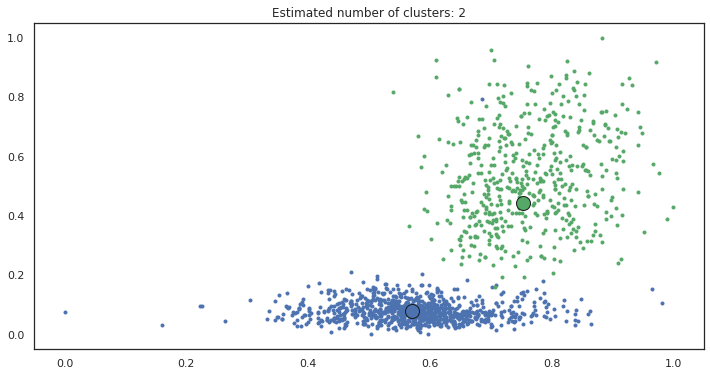

In [ ]:
#%% Plot result
plt.figure(1)
plt.clf()
 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(scaled_features_copy_temp2.iloc[my_members, 0], scaled_features_copy_temp2.iloc[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1],
             'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

De forma similar, probamos con la gausiana y vemos también que los resultados son dos clústers muy parecidos a los anteriores

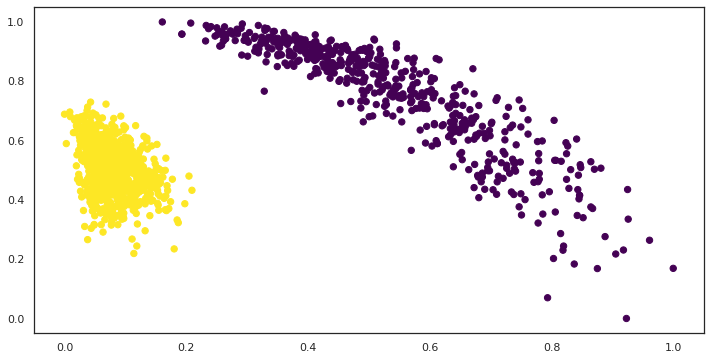

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(scaled_features_copy_temp)
labels = gmm.predict(scaled_features_copy_temp)
plt.scatter(scaled_features_copy_temp.iloc[:, 1], scaled_features_copy_temp.iloc[:, 2], c=labels, s=40, cmap='viridis');


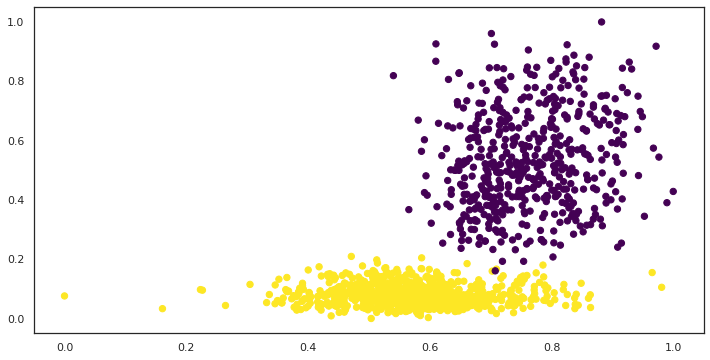

In [ ]:
plt.scatter(scaled_features_copy_temp.iloc[:, 0], scaled_features_copy_temp.iloc[:, 1], c=labels, s=40, cmap='viridis');

Como todos los métodos anteriores salen muy parecidos, decido escoger el k-means como método final ya que es muy fácil de entender, de explicar a un cliente final y también es muy conocido y nos da buenos resultados.

Añado la variable con el número de clúster a nuestro dataset

In [ ]:
scaled_features_copy['k-means cluster']= y_pred
scaled_features_copy.head()

,city,weekofyear,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,k-means cluster
0,sj,18,1990,0.578226,0.614835,0.386418,0.395544,0.031797,0.388291,0.354667,0.314680,0.123457,0.692308,0.056091,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450,0
1,sj,19,1990,0.629943,0.657063,0.321190,0.359233,0.058423,0.472710,0.441778,0.489213,0.191358,0.730769,0.031446,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829,0
2,sj,20,1990,0.479441,0.690881,0.311879,0.384430,0.088428,0.548064,0.496000,0.657583,0.166667,0.800000,0.045749,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201,0
3,sj,21,1990,0.584823,0.770066,0.438912,0.491150,0.039324,0.575260,0.539556,0.643471,0.222222,0.776923,0.024365,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362,0
4,sj,22,1990,0.658698,0.788882,0.481601,0.509943,0.019252,0.645515,0.593778,0.701541,0.253086,0.815385,0.021385,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676,0


A continuación, tenemos que ver si es realmente cierto que esos dos clústers se corresponden con las dos diferentes ciudades de estudio. Para ello, realizo una matriz de correlación y se ve que la correlación del número de clúster con la ciudad es del 100% por lo que concluimos que los clústers están correlacionados directamente con cada una de las ciudades.

[[1. 1.]
 [1. 1.]]


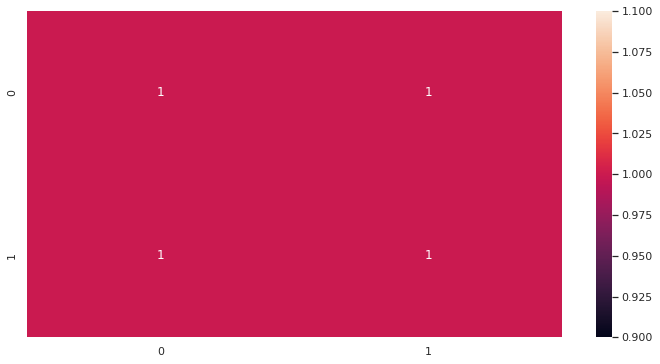

In [ ]:
## Aquí demostramos que la separación de clusters corresponde a las dos ciudades diferentes que tenemos por tener una correlación de 1.

scaled_features_copy_corr=scaled_features_copy.copy()
scaled_features_copy_corr['city'] = np.where(scaled_features_copy['city']=='iq', 1, 0)
C = np.corrcoef(scaled_features_copy_corr['city'],scaled_features_copy_corr['k-means cluster'])
print(C)

sns.heatmap(C, annot = True)